In [1]:
# Ravi Kiran Mahoorkar
#importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 1. Data Exploration and Preprocessing:

In [2]:
#loading dataset
df=pd.read_csv('adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#checking for null values
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [4]:
#checking for duplicates
df.duplicated().sum()

24

In [5]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [6]:
#describing dataset
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# more info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


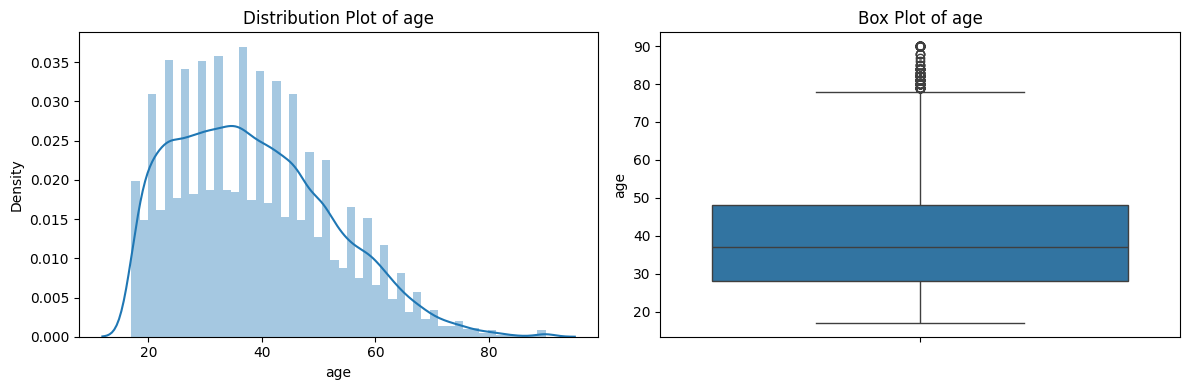

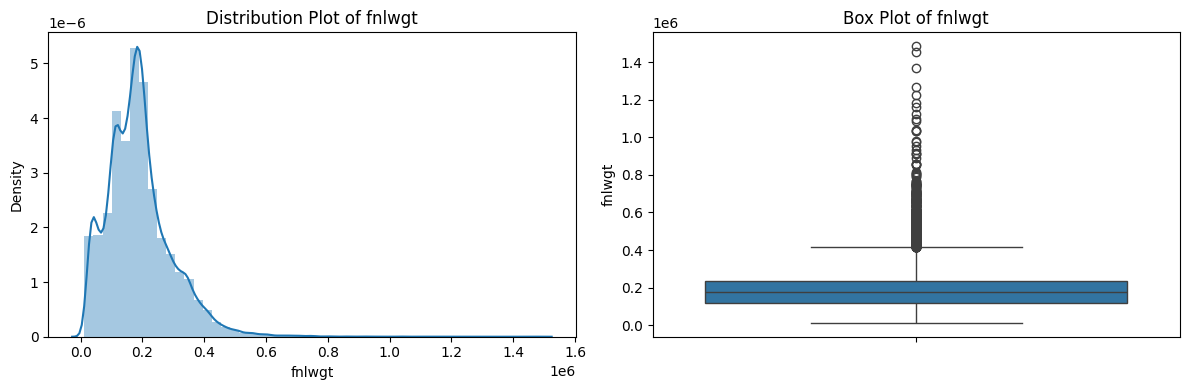

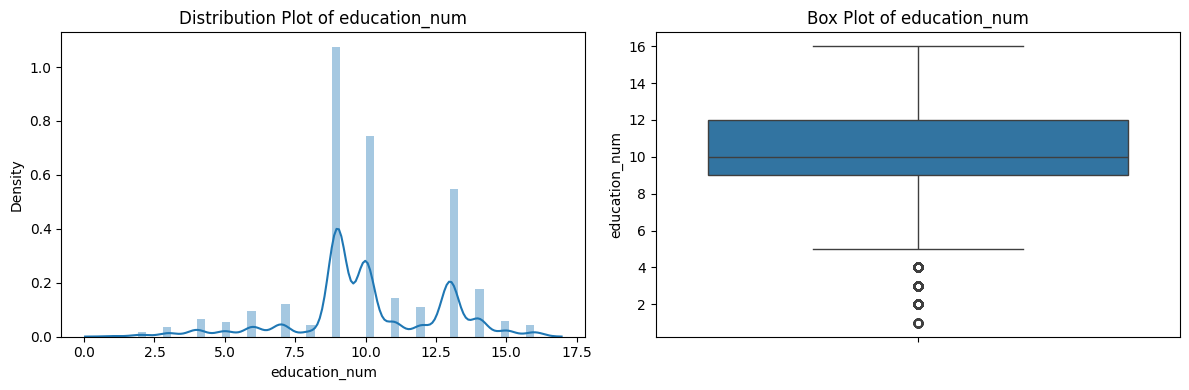

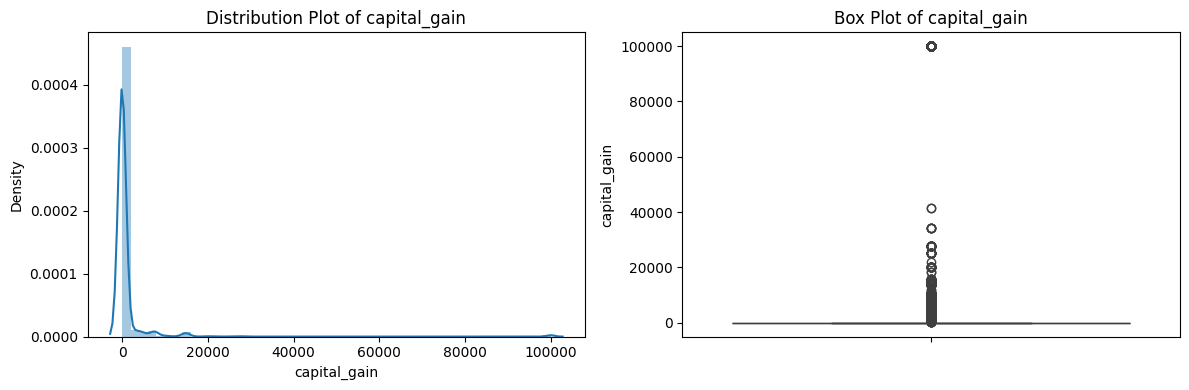

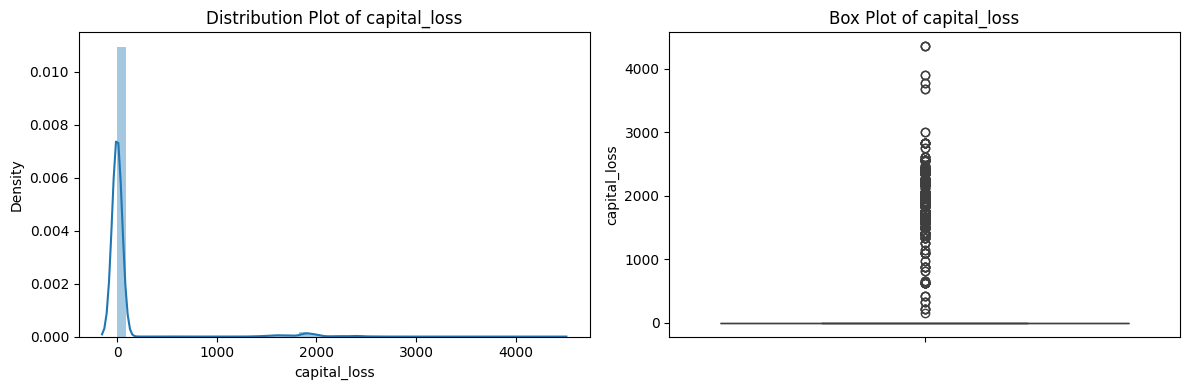

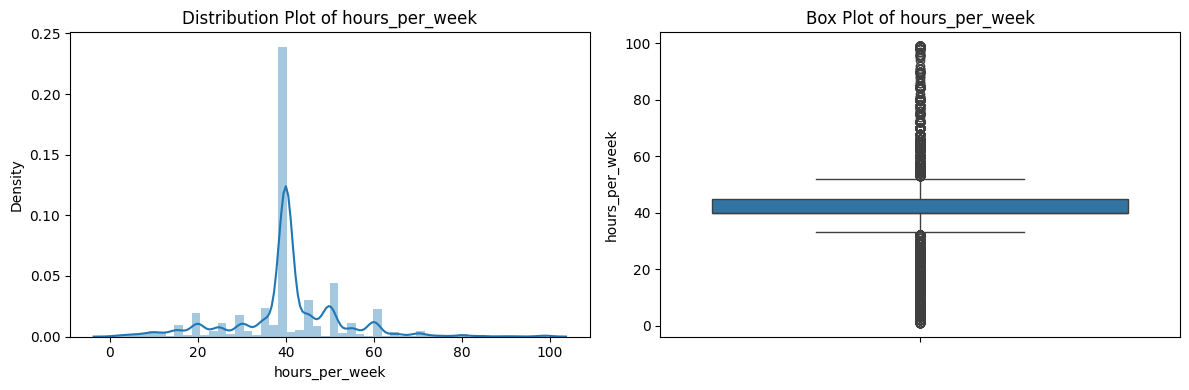

In [8]:
# dist plot and box plot of all numerical columns

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame (as defined in the previous code)

numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(12, 4))  # Adjust figure size as needed

    # Distribution Plot
    plt.subplot(1, 2, 1)
    sns.distplot(df[col])
    plt.title(f'Distribution Plot of {col}')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')

    plt.tight_layout()  # Adjust subplot params for a tight layout
    plt.show()

In [9]:
# Standard Scaling for numerical columns

from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and numerical_cols are defined as before

numerical_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Now the numerical columns in 'df' are standard scaled
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030390,State-gov,-1.063569,Bachelors,1.134777,Never-married,Adm-clerical,Not-in-family,White,Male,0.148292,-0.216743,-0.035664,United-States,<=50K
1,0.836973,Self-emp-not-inc,-1.008668,Bachelors,1.134777,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145975,-0.216743,-2.222483,United-States,<=50K
2,-0.042936,Private,0.245040,HS-grad,-0.420679,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K
3,1.056950,Private,0.425752,11th,-1.198407,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K
4,-0.776193,Private,1.408066,Bachelors,1.134777,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145975,-0.216743,-0.035664,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,Private,0.639678,Assoc-acdm,0.745913,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145975,-0.216743,-0.197650,United-States,<=50K
32557,0.103716,Private,-0.335436,HS-grad,-0.420679,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145975,-0.216743,-0.035664,United-States,>50K
32558,1.423579,Private,-0.358779,HS-grad,-0.420679,Widowed,Adm-clerical,Unmarried,White,Female,-0.145975,-0.216743,-0.035664,United-States,<=50K
32559,-1.216148,Private,0.110930,HS-grad,-0.420679,Never-married,Adm-clerical,Own-child,White,Male,-0.145975,-0.216743,-1.655530,United-States,<=50K


In [10]:
# Discuss the scenarios where each scaling technique is preferred and why.
'''
Standard Scaling:
What it does: Transforms the data to have a mean of 0 and a standard deviation of 1.
When to use: Preferred when the data follows a Gaussian (normal) distribution.
Why: It helps models like linear regression and neural networks that assume normally distributed data.

Min-Max Scaling:
What it does: Rescales features to a specific range, typically [0, 1].
When to use: Ideal when features have varying scales but are bounded in a known range.
Why: Useful for algorithms like k-nearest neighbour's and neural networks that are sensitive to the magnitude of data.
'''

"\nStandard Scaling:\nWhat it does: Transforms the data to have a mean of 0 and a standard deviation of 1.\nWhen to use: Preferred when the data follows a Gaussian (normal) distribution.\nWhy: It helps models like linear regression and neural networks that assume normally distributed data.\n\nMin-Max Scaling:\nWhat it does: Rescales features to a specific range, typically [0, 1].\nWhen to use: Ideal when features have varying scales but are bounded in a known range.\nWhy: Useful for algorithms like k-nearest neighbour's and neural networks that are sensitive to the magnitude of data.\n"

In [11]:
# Display unique values for all object-type columns
for col in df.select_dtypes(include='object'):
    print(f"Column '{col}' unique values: {df[col].unique()}")

Column 'workclass' unique values: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Column 'education' unique values: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Column 'marital_status' unique values: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Column 'occupation' unique values: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Column 'relationship' unique values: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Column 'race' unique values: [' White' ' Bla

In [12]:
# Display the number of unique values for all object-type columns
for col in df.select_dtypes(include='object'):
    print(f"Column '{col}' has {df[col].nunique()} unique values.")

Column 'workclass' has 9 unique values.
Column 'education' has 16 unique values.
Column 'marital_status' has 7 unique values.
Column 'occupation' has 15 unique values.
Column 'relationship' has 6 unique values.
Column 'race' has 5 unique values.
Column 'sex' has 2 unique values.
Column 'native_country' has 42 unique values.
Column 'income' has 2 unique values.


# 2. Encoding Techniques:

In [13]:
#copying dataset
df1=df.copy()

In [14]:
# Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to columns with more than 5 unique categories
for col in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race' ,'native_country','income']:
    df1[col] = label_encoder.fit_transform(df1[col])

df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030390,7,-1.063569,9,1.134777,4,1,1,4,Male,0.148292,-0.216743,-0.035664,39,0
1,0.836973,6,-1.008668,9,1.134777,2,4,0,4,Male,-0.145975,-0.216743,-2.222483,39,0
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,4,Male,-0.145975,-0.216743,-0.035664,39,0
3,1.056950,4,0.425752,1,-1.198407,2,6,0,2,Male,-0.145975,-0.216743,-0.035664,39,0
4,-0.776193,4,1.408066,9,1.134777,2,10,5,2,Female,-0.145975,-0.216743,-0.035664,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,4,0.639678,7,0.745913,2,13,5,4,Female,-0.145975,-0.216743,-0.197650,39,0
32557,0.103716,4,-0.335436,11,-0.420679,2,7,0,4,Male,-0.145975,-0.216743,-0.035664,39,1
32558,1.423579,4,-0.358779,11,-0.420679,6,1,4,4,Female,-0.145975,-0.216743,-0.035664,39,0
32559,-1.216148,4,0.110930,11,-0.420679,4,1,3,4,Male,-0.145975,-0.216743,-1.655530,39,0


In [15]:
# Generate dummy variables for the 'sex' and 'income' columns
df1_dummies = pd.get_dummies(df1['sex'], dtype=int) # Changed to select multiple columns correctly

# Concatenate the dummy variables with the original DataFrame (excluding the original 'sex' and 'income' columns)
df1 = pd.concat([df1.drop(columns=['sex']), df1_dummies], axis=1)
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male
0,0.030390,7,-1.063569,9,1.134777,4,1,1,4,0.148292,-0.216743,-0.035664,39,0,0,1
1,0.836973,6,-1.008668,9,1.134777,2,4,0,4,-0.145975,-0.216743,-2.222483,39,0,0,1
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,4,-0.145975,-0.216743,-0.035664,39,0,0,1
3,1.056950,4,0.425752,1,-1.198407,2,6,0,2,-0.145975,-0.216743,-0.035664,39,0,0,1
4,-0.776193,4,1.408066,9,1.134777,2,10,5,2,-0.145975,-0.216743,-0.035664,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,4,0.639678,7,0.745913,2,13,5,4,-0.145975,-0.216743,-0.197650,39,0,1,0
32557,0.103716,4,-0.335436,11,-0.420679,2,7,0,4,-0.145975,-0.216743,-0.035664,39,1,0,1
32558,1.423579,4,-0.358779,11,-0.420679,6,1,4,4,-0.145975,-0.216743,-0.035664,39,0,1,0
32559,-1.216148,4,0.110930,11,-0.420679,4,1,3,4,-0.145975,-0.216743,-1.655530,39,0,0,1


In [16]:
#some correction
df1.columns = [col.replace(' Female', 'Female') for col in df1.columns]
df1.columns = [col.replace(' Male', 'Male') for col in df1.columns]

In [17]:
# Datatype check
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32537 non-null  float64
 1   workclass       32537 non-null  int64  
 2   fnlwgt          32537 non-null  float64
 3   education       32537 non-null  int64  
 4   education_num   32537 non-null  float64
 5   marital_status  32537 non-null  int64  
 6   occupation      32537 non-null  int64  
 7   relationship    32537 non-null  int64  
 8   race            32537 non-null  int64  
 9   capital_gain    32537 non-null  float64
 10  capital_loss    32537 non-null  float64
 11  hours_per_week  32537 non-null  float64
 12  native_country  32537 non-null  int64  
 13  income          32537 non-null  int64  
 14  Female          32537 non-null  int64  
 15  Male            32537 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 4.2 MB


In [18]:
# Discuss the pros and cons of One-Hot Encoding and Label Encoding
'''
One-Hot Encoding:

Pros:
Avoids introducing any ordinal relationship between categories.
Suitable for categorical data without any inherent order (nominal data).
Works well for algorithms that cannot handle categorical data directly (e.g., linear regression, neural networks).

Cons:
Increases the dimensionality of the dataset, especially with high-cardinality features.
Can lead to sparse matrices, increasing memory and computation time.
May cause issues with models that rely on distance metrics (e.g., k-NN).

Label Encoding:

Pros:
Reduces the dimensionality of the dataset (single column instead of multiple).
Efficient in terms of memory and computation.
Works well with tree-based algorithms (e.g., decision trees, random forests) that can handle numeric values directly.

Cons:
Assumes an ordinal relationship between categories, which may not exist.
May mislead models that interpret numbers as continuous (e.g., linear models).
Not suitable for nominal data where no intrinsic ordering is present.
'''

'\nOne-Hot Encoding:\n\nPros:\nAvoids introducing any ordinal relationship between categories.\nSuitable for categorical data without any inherent order (nominal data).\nWorks well for algorithms that cannot handle categorical data directly (e.g., linear regression, neural networks).\n\nCons:\nIncreases the dimensionality of the dataset, especially with high-cardinality features.\nCan lead to sparse matrices, increasing memory and computation time.\nMay cause issues with models that rely on distance metrics (e.g., k-NN).\n\nLabel Encoding:\n\nPros:\nReduces the dimensionality of the dataset (single column instead of multiple).\nEfficient in terms of memory and computation.\nWorks well with tree-based algorithms (e.g., decision trees, random forests) that can handle numeric values directly.\n\nCons:\nAssumes an ordinal relationship between categories, which may not exist.\nMay mislead models that interpret numbers as continuous (e.g., linear models).\nNot suitable for nominal data where

# 3. Feature Engineering:

In [19]:
df2=df1.copy()
df2

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male
0,0.030390,7,-1.063569,9,1.134777,4,1,1,4,0.148292,-0.216743,-0.035664,39,0,0,1
1,0.836973,6,-1.008668,9,1.134777,2,4,0,4,-0.145975,-0.216743,-2.222483,39,0,0,1
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,4,-0.145975,-0.216743,-0.035664,39,0,0,1
3,1.056950,4,0.425752,1,-1.198407,2,6,0,2,-0.145975,-0.216743,-0.035664,39,0,0,1
4,-0.776193,4,1.408066,9,1.134777,2,10,5,2,-0.145975,-0.216743,-0.035664,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,4,0.639678,7,0.745913,2,13,5,4,-0.145975,-0.216743,-0.197650,39,0,1,0
32557,0.103716,4,-0.335436,11,-0.420679,2,7,0,4,-0.145975,-0.216743,-0.035664,39,1,0,1
32558,1.423579,4,-0.358779,11,-0.420679,6,1,4,4,-0.145975,-0.216743,-0.035664,39,0,1,0
32559,-1.216148,4,0.110930,11,-0.420679,4,1,3,4,-0.145975,-0.216743,-1.655530,39,0,0,1


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df2, features):
    vif = pd.DataFrame()
    vif["Features"] = features
    vif["VIF"] = [variance_inflation_factor(df2[features].values, i) for i in range(df2[features].shape[1])]
    return vif

# Updated list of features
features = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country','Female','Male']

# Calculate VIF for df2
vif_data = calculate_vif(df2, features)
vif_data

,Features,VIF
0,age,1.160356
1,workclass,1.093985
2,fnlwgt,1.012308
3,education,1.159195
4,education_num,1.218378
5,marital_status,1.127315
6,occupation,1.091831
7,relationship,1.683261
8,race,1.038289
9,capital_gain,1.028262


In [21]:
# Create a composite gender feature, assigning 1 for Male and 0 for Female
df2['is_female'] = df2['Female']  # Assuming 'Male' is the column for males and 'Female' is dropped

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df2, features):
    vif = pd.DataFrame()
    vif["Features"] = features
    vif["VIF"] = [variance_inflation_factor(df2[features].values, i) for i in range(df2[features].shape[1])]
    return vif

# Updated list of features
features = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country','is_female']

# Calculate VIF for df2
vif_data = calculate_vif(df2, features)
vif_data

,Features,VIF
0,age,1.144132
1,workclass,8.009135
2,fnlwgt,1.009969
3,education,8.197965
4,education_num,1.183629
5,marital_status,4.159427
6,occupation,3.626956
7,relationship,2.997648
8,race,15.284156
9,capital_gain,1.028241


In [23]:
#New Features from High-VIF Variables
'''
1. Socioeconomic Index
Formula: ##socioeconomic_index = workclass * education_num##
Rationale: Workclass and education are often related to socioeconomic status.
Combining them could help capture this relationship while reducing multicollinearity with individual variables.
2. Cultural Diversity Impact
Formula: ##cultural_diversity = race * native_country##
Rationale: Race and native country together might capture the influence of cultural diversity in the dataset.
This feature could be particularly relevant if these attributes have joint effects on income or other target variables.
'''

'\n1. Socioeconomic Index\nFormula: ##socioeconomic_index = workclass * education_num##\nRationale: Workclass and education are often related to socioeconomic status.\nCombining them could help capture this relationship while reducing multicollinearity with individual variables.\n2. Cultural Diversity Impact\nFormula: ##cultural_diversity = race * native_country##\nRationale: Race and native country together might capture the influence of cultural diversity in the dataset.\nThis feature could be particularly relevant if these attributes have joint effects on income or other target variables.\n'

In [24]:
df2['socioeconomic_index'] = df2['workclass'] * df2['education_num']
df2['cultural_diversity'] = df2['race'] * df2['native_country']
df2.drop(columns=['workclass', 'education_num', 'race', 'native_country','Female', 'Male'], inplace=True)
df2

,age,fnlwgt,education,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,income,is_female,socioeconomic_index,cultural_diversity
0,0.030390,-1.063569,9,4,1,1,0.148292,-0.216743,-0.035664,0,0,7.943440,156
1,0.836973,-1.008668,9,2,4,0,-0.145975,-0.216743,-2.222483,0,0,6.808663,156
2,-0.042936,0.245040,11,0,6,1,-0.145975,-0.216743,-0.035664,0,0,-1.682715,156
3,1.056950,0.425752,1,2,6,0,-0.145975,-0.216743,-0.035664,0,0,-4.793626,78
4,-0.776193,1.408066,9,2,10,5,-0.145975,-0.216743,-0.035664,0,1,4.539108,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,0.639678,7,2,13,5,-0.145975,-0.216743,-0.197650,0,1,2.983653,156
32557,0.103716,-0.335436,11,2,7,0,-0.145975,-0.216743,-0.035664,1,0,-1.682715,156
32558,1.423579,-0.358779,11,6,1,4,-0.145975,-0.216743,-0.035664,0,1,-1.682715,156
32559,-1.216148,0.110930,11,4,1,3,-0.145975,-0.216743,-1.655530,0,0,-1.682715,156


In [25]:
df2.columns

Index(['age', 'fnlwgt', 'education', 'marital_status', 'occupation',
       'relationship', 'capital_gain', 'capital_loss', 'hours_per_week',
       'income', 'is_female', 'socioeconomic_index', 'cultural_diversity'],
      dtype='object')

In [26]:
#calculate vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df2, features):
    vif = pd.DataFrame()
    vif["Features"] = features
    vif["VIF"] = [variance_inflation_factor(df2[features].values, i) for i in range(df2[features].shape[1])]
    return vif

# Updated list of features
features = ['age', 'fnlwgt', 'education', 'marital_status', 'occupation',
       'relationship', 'capital_gain', 'capital_loss', 'hours_per_week',
      'is_female', 'socioeconomic_index',
       'cultural_diversity']

# Calculate VIF for df2
vif_data = calculate_vif(df2, features)
vif_data

,Features,VIF
0,age,1.129913
1,fnlwgt,1.009953
2,education,6.439817
3,marital_status,3.853169
4,occupation,3.069779
5,relationship,2.959607
6,capital_gain,1.028828
7,capital_loss,1.014432
8,hours_per_week,1.120416
9,is_female,2.322193


In [27]:
#log transformation
# Apply log1p transformation to reduce skewness for highly skewed features
df2['capital_gain_log'] = np.log1p(df2['capital_gain'])
df2['capital_loss_log'] = np.log1p(df2['capital_loss'])

# Calculate skewness for transformed features
transformed_skewness = df2[['capital_gain_log', 'capital_loss_log']].skew()

# Display the results
print("Skewness after transformation:")
print(transformed_skewness)

Skewness after transformation:
capital_gain_log    5.898422
capital_loss_log    4.361902
dtype: float64


In [28]:
df2.drop(columns=['capital_gain', 'capital_loss'], inplace=True)
df2

,age,fnlwgt,education,marital_status,occupation,relationship,hours_per_week,income,is_female,socioeconomic_index,cultural_diversity,capital_gain_log,capital_loss_log
0,0.030390,-1.063569,9,4,1,1,-0.035664,0,0,7.943440,156,0.138275,-0.244295
1,0.836973,-1.008668,9,2,4,0,-2.222483,0,0,6.808663,156,-0.157795,-0.244295
2,-0.042936,0.245040,11,0,6,1,-0.035664,0,0,-1.682715,156,-0.157795,-0.244295
3,1.056950,0.425752,1,2,6,0,-0.035664,0,0,-4.793626,78,-0.157795,-0.244295
4,-0.776193,1.408066,9,2,10,5,-0.035664,0,1,4.539108,10,-0.157795,-0.244295
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,0.639678,7,2,13,5,-0.197650,0,1,2.983653,156,-0.157795,-0.244295
32557,0.103716,-0.335436,11,2,7,0,-0.035664,1,0,-1.682715,156,-0.157795,-0.244295
32558,1.423579,-0.358779,11,6,1,4,-0.035664,0,1,-1.682715,156,-0.157795,-0.244295
32559,-1.216148,0.110930,11,4,1,3,-1.655530,0,0,-1.682715,156,-0.157795,-0.244295


In [29]:
#splitting data for test and train
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df2.drop(columns=['income'])  # Replace 'income' with your target column name if different
y = df2['income']                 # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (26029, 12)
X_test shape: (6508, 12)
y_train shape: (26029,)
y_test shape: (6508,)


In [30]:
#model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5, random_state=42,min_samples_split=3)# C 5.0
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=3,
                       random_state=42)

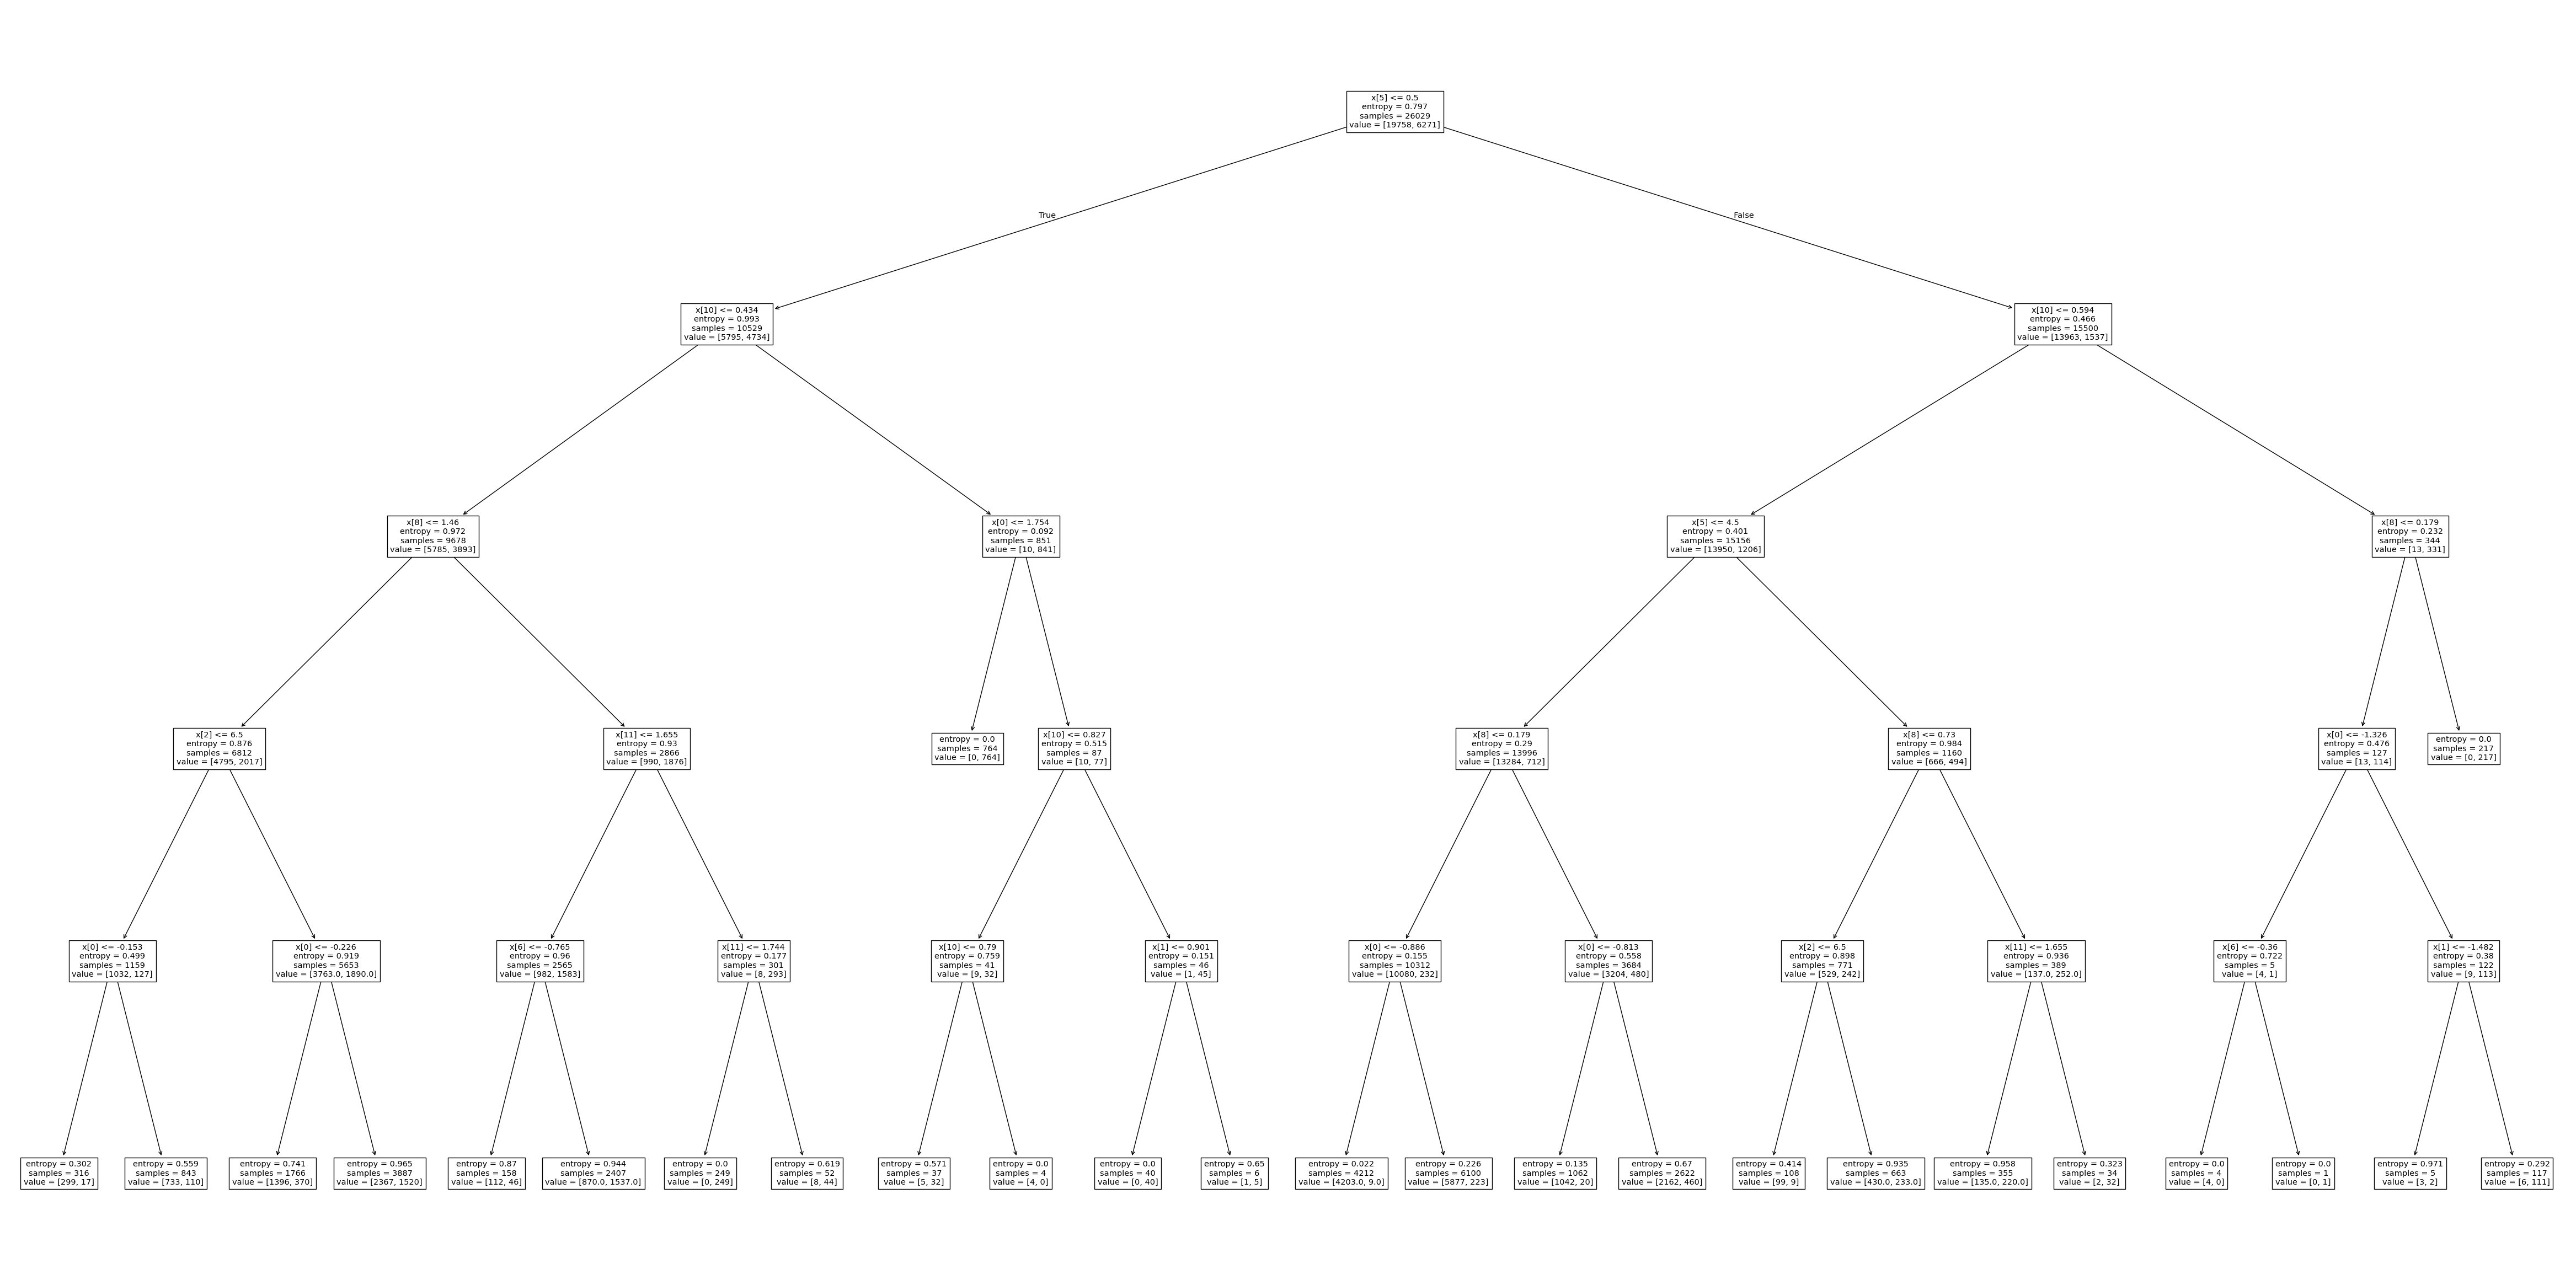

In [31]:
#PLot the decision tree
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(60, 30))
tree.plot_tree(model);
plt.show()

In [32]:
#important features
# Updated features list to match the columns used in the model
features = ['age', 'fnlwgt', 'education', 'marital_status', 'occupation',
       'relationship', 'hours_per_week',
       'is_female', 'socioeconomic_index',
       'cultural_diversity', 'capital_gain_log', 'capital_loss_log']

feature_imp = pd.Series(model.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

,0
relationship,0.477958
capital_gain_log,0.250390
socioeconomic_index,0.156008
age,0.057985
education,0.027156
capital_loss_log,0.022336
hours_per_week,0.006902
fnlwgt,0.001266
marital_status,0.000000
occupation,0.000000


In [33]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

,0
0,5398
1,1110


In [34]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0,1
income,,
0,4675,265
1,723,845


In [35]:
# Accuracy
np.mean(preds==y_test)

0.8481868469575906

In [36]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, preds)
conf_matrix = confusion_matrix(y_test, preds)
class_report = classification_report(y_test, preds)

# Display evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.85

Confusion Matrix:
[[4675  265]
 [ 723  845]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.90      4940
           1       0.76      0.54      0.63      1568

    accuracy                           0.85      6508
   macro avg       0.81      0.74      0.77      6508
weighted avg       0.84      0.85      0.84      6508



# **4. Feature Selection:**

In [37]:
#copying dataset
dfi=df2.copy()

In [38]:
from sklearn.ensemble import IsolationForest

# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(dfi)

IsolationForest(contamination=0.01, random_state=10)

In [39]:
# predictions
yi_pred = clf.predict(dfi)
yi_pred

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
#detecting outiers
dfi.loc[yi_pred==-1]

,age,fnlwgt,education,marital_status,occupation,relationship,hours_per_week,income,is_female,socioeconomic_index,cultural_diversity,capital_gain_log,capital_loss_log
52,0.616996,-1.306864,14,2,10,5,1.584202,1,1,7.650020,64,-0.157795,1.705064
93,-0.629542,-0.682431,11,2,12,5,-0.440630,0,1,-1.682715,0,-0.157795,1.544485
112,1.276928,1.381501,11,2,8,0,0.774269,1,0,-2.524072,8,-0.157795,1.698278
157,2.376814,2.884208,15,5,12,4,-3.113409,0,0,-0.190888,78,-0.157795,1.665514
226,1.570231,-1.568529,0,0,0,1,-2.465463,0,1,-0.000000,0,-0.157795,-0.244295
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32370,1.056950,-0.494850,14,4,10,1,-0.035664,1,0,11.475030,30,1.530558,-0.244295
32469,1.423579,-0.073960,10,4,10,1,4.742941,0,1,11.506845,0,-0.157795,-0.244295
32500,-0.336239,-1.224139,1,0,14,4,1.584202,0,0,-4.793626,156,-0.157795,1.087336
32525,3.110071,-0.656558,8,0,0,4,-3.194403,0,1,0.000000,0,-0.157795,-0.244295


In [41]:
# removing outliers
# Get the indices of the outliers
outlier_indices = dfi.loc[yi_pred == -1].index

# Remove the outliers from the DataFrame
dfii = dfi.drop(outlier_indices)
dfii.shape

(32211, 13)

In [42]:
#reset index
dfii.reset_index(drop=True, inplace=True)
dfii

,age,fnlwgt,education,marital_status,occupation,relationship,hours_per_week,income,is_female,socioeconomic_index,cultural_diversity,capital_gain_log,capital_loss_log
0,0.030390,-1.063569,9,4,1,1,-0.035664,0,0,7.943440,156,0.138275,-0.244295
1,0.836973,-1.008668,9,2,4,0,-2.222483,0,0,6.808663,156,-0.157795,-0.244295
2,-0.042936,0.245040,11,0,6,1,-0.035664,0,0,-1.682715,156,-0.157795,-0.244295
3,1.056950,0.425752,1,2,6,0,-0.035664,0,0,-4.793626,78,-0.157795,-0.244295
4,-0.776193,1.408066,9,2,10,5,-0.035664,0,1,4.539108,10,-0.157795,-0.244295
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32206,-0.849519,0.639678,7,2,13,5,-0.197650,0,1,2.983653,156,-0.157795,-0.244295
32207,0.103716,-0.335436,11,2,7,0,-0.035664,1,0,-1.682715,156,-0.157795,-0.244295
32208,1.423579,-0.358779,11,6,1,4,-0.035664,0,1,-1.682715,156,-0.157795,-0.244295
32209,-1.216148,0.110930,11,4,1,3,-1.655530,0,0,-1.682715,156,-0.157795,-0.244295


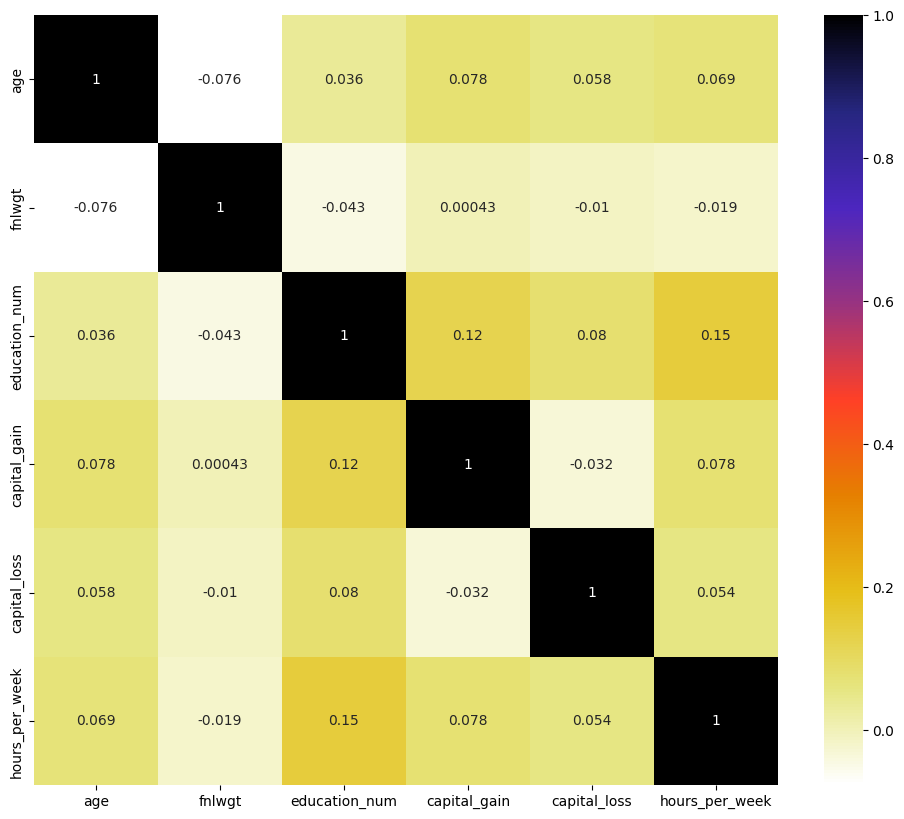

In [43]:
# correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
cor = df.corr(numeric_only=True)
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [44]:
#installing ppscore
!pip install ppscore -q

In [45]:
#PPS (Predictive Power Score)
import ppscore as pps

# Calculate the PPS between all pairs of columns, with 'income' as the target variable
pps_matrix = pps.predictors(df, y="income")  # Specify the target column

# Display the PPS matrix
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,capital_gain,income,3.194126e-01,classification,True,weighted F1,0.646362,0.759318,DecisionTreeClassifier()
1,education,income,2.471221e-01,classification,True,weighted F1,0.646362,0.733754,DecisionTreeClassifier()
2,education_num,income,2.471221e-01,classification,True,weighted F1,0.646362,0.733754,DecisionTreeClassifier()
3,capital_loss,income,1.378885e-01,classification,True,weighted F1,0.646362,0.695124,DecisionTreeClassifier()
4,workclass,income,1.092573e-01,classification,True,weighted F1,0.646362,0.684999,DecisionTreeClassifier()
5,occupation,income,4.651070e-02,classification,True,weighted F1,0.646362,0.662810,DecisionTreeClassifier()
6,age,income,1.685320e-02,classification,True,weighted F1,0.646362,0.652322,DecisionTreeClassifier()
7,native_country,income,9.880092e-03,classification,True,weighted F1,0.646362,0.649856,DecisionTreeClassifier()
8,hours_per_week,income,8.571054e-03,classification,True,weighted F1,0.646362,0.649393,DecisionTreeClassifier()
9,relationship,income,1.260964e-07,classification,True,weighted F1,0.646362,0.646362,DecisionTreeClassifier()


In [46]:
# Comparison Summary:
'''
# 1. Correlation matrix reveals linear relationships between numerical features,
while PPS assesses the predictive power of features for the target variable.
# 2. Correlation might show strong relationships that are not predictive, whereas PPS focuses on how well a feature predicts the target.
# 3.  Correlation coefficients are symmetrical, but PPS scores are directional,
showing the predictive power of feature X for feature Y, but not the reverse.
# 4. PPS provides a more comprehensive understanding of feature importance for predictive modeling,
while the correlation matrix is mainly for numerical features.
# 5. Comparing both methods helps identify features important for prediction,
while also considering possible collinearity issues from the correlation matrix.
'''

'\n# 1. Correlation matrix reveals linear relationships between numerical features, \nwhile PPS assesses the predictive power of features for the target variable.\n# 2. Correlation might show strong relationships that are not predictive, whereas PPS focuses on how well a feature predicts the target.\n# 3.  Correlation coefficients are symmetrical, but PPS scores are directional, \nshowing the predictive power of feature X for feature Y, but not the reverse.\n# 4. PPS provides a more comprehensive understanding of feature importance for predictive modeling, \nwhile the correlation matrix is mainly for numerical features.\n# 5. Comparing both methods helps identify features important for prediction, \nwhile also considering possible collinearity issues from the correlation matrix.\n'